# Part I - Ford GoBike System Data
## by Luke Confait

## Introduction
Ford GoBike, which is currently called Bay Wheels and owned by lyft, is a Bike sharing service operating in the greater San Francisco Bay area. The data set is comprised of 183412 bike trips undertaken in February 2019.

## Preliminary Wrangling

In [1]:
!pip install geopy

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy import distance, Point

%matplotlib inline

In [3]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

Taking a look at the overall structure of the dataset

In [4]:
print(bike_data.shape)


(183412, 16)


In [5]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


I have decided to perform some initial data cleaning to assist in creating visualisations

In [9]:
print(bike_data['end_station_name'].nunique())
print(bike_data['start_station_name'].nunique())

329
329


There are 329 stations, since this is a large number it will make for difficult to interpret visualisations and so this feature will not be investigated.

Make a Copy for data cleaning.

In [10]:
bike_data_copy = bike_data.copy()

Rows are dropped where __'member_birth_year'__ is null. This also deals with Null values in the __'member_gender'__ column.

In [11]:
bike_data_copy.dropna(subset=['member_birth_year'],inplace=True)

In [12]:
bike_data_copy.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

There are some problematic birth years that dont make sense as the users could not be that old. We can limit the dataset to users born after 1940.

In [13]:
bike_data_copy = bike_data_copy[bike_data_copy['member_birth_year'] > 1940]

In [14]:
bike_data_copy['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1943.0       30
1942.0       21
1946.0       19
1941.0        9
1944.0        2
Name: member_birth_year, Length: 61, dtype: int64

The time and hour for start and end is put into seperate columns.

In [15]:
bike_data_copy['start_date'] = pd.to_datetime(bike_data_copy.start_time).dt.date
bike_data_copy['start_hour'] = pd.to_datetime(bike_data_copy.start_time).dt.hour

bike_data_copy['end_date'] = pd.to_datetime(bike_data_copy.end_time).dt.date
bike_data_copy['end_hour'] = pd.to_datetime(bike_data_copy.end_time).dt.hour


Print the min and max __'start_date'__ to determine the period of data collection.

In [16]:
print(min(pd.to_datetime(bike_data_copy['start_date'])))
print(max(pd.to_datetime(bike_data_copy['start_date'])))

2019-02-01 00:00:00
2019-02-28 00:00:00


In [17]:
print(bike_data_copy['start_hour'].sample(1))
print(bike_data_copy['end_hour'].sample(1))

3455    17
Name: start_hour, dtype: int64
117552    21
Name: end_hour, dtype: int64


It would be useful to have a **'start_day_of_week'** feature for analysis.

In [18]:
bike_data_copy['start_day_of_week'] = pd.to_datetime(bike_data_copy['start_date']).dt.day_name()

It would interesting to see if the trips were between 2 different station or if the trip ended at the same place.

In [19]:
bike_data_copy['same_end_and_start_station'] = bike_data_copy['start_station_id'] == bike_data_copy['end_station_id']
bike_data_copy['same_end_and_start_station'].value_counts()

False    171488
True       3456
Name: same_end_and_start_station, dtype: int64

In 3456 trips the trip ended at the station it started at.

The straight line distance between the start and end stations be engineered from the longitude and latitudes of the start and end stations. This stackoverflow [post](https://stackoverflow.com/questions/55909305/using-geopy-in-a-dataframe-to-get-distances) proved useful in figuring out how to implement this.

In [20]:
# Use geopy to get the start and end points of each trip
bike_data_copy['start_point'] = bike_data_copy.apply(
    lambda x: Point(latitude=x['start_station_latitude'], longitude=x['start_station_longitude']),
    axis=1)
bike_data_copy['end_point'] = bike_data_copy.apply(
    lambda x: Point(latitude=x['end_station_latitude'], longitude=x['start_station_longitude']),
    axis=1)
    
bike_data_copy['start_point'].sample(5)

142118    37 47m 46.4928s N, 122 16m 45.6672s W
144566      37 47m 38.868s N, 122 23m 39.948s W
30113     37 47m 1.72575s N, 122 26m 4.41193s W
34518      37 19m 47.0352s N, 121 54m 6.4152s W
122479      37 46m 33.168s N, 122 23m 35.412s W
Name: start_point, dtype: object

In [21]:
# use the geopy distance method to get the distance between the start and end points
bike_data_copy['distance_km'] = bike_data_copy.apply(lambda x: distance.distance(x['start_point'],x['end_point']).km,axis=1)

Drop columns that wont be analysed or are no longer needed

In [22]:
bike_data_copy.drop(['bike_id','start_point','end_point','start_station_id','start_station_name','end_station_id','end_station_name'],axis=1,inplace=True)

In [23]:
bike_data_copy.shape

(174944, 18)

There are a number of columns that have categorical values and so the data type should be changed to reflect this.

In [24]:
bike_data_copy['user_type'].value_counts()

Subscriber    158326
Customer       16618
Name: user_type, dtype: int64

In [25]:
bike_data_copy['member_gender'].value_counts()

Male      130491
Female     40804
Other       3649
Name: member_gender, dtype: int64

In [26]:
bike_data_copy['bike_share_for_all_trip'].value_counts()

No     157639
Yes     17305
Name: bike_share_for_all_trip, dtype: int64

In [27]:
bike_data_copy['user_type'] = bike_data_copy['user_type'].astype('category')
bike_data_copy['member_gender'] = bike_data_copy['member_gender'].astype('category')
bike_data_copy['bike_share_for_all_trip'] = bike_data_copy['bike_share_for_all_trip'].astype('category')

In [28]:
bike_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174944 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec                  174944 non-null int64
start_time                    174944 non-null object
end_time                      174944 non-null object
start_station_latitude        174944 non-null float64
start_station_longitude       174944 non-null float64
end_station_latitude          174944 non-null float64
end_station_longitude         174944 non-null float64
user_type                     174944 non-null category
member_birth_year             174944 non-null float64
member_gender                 174944 non-null category
bike_share_for_all_trip       174944 non-null category
start_date                    174944 non-null object
start_hour                    174944 non-null int64
end_date                      174944 non-null object
end_hour                      174944 non-null int64
start_day_of_week             174944 non-null object
same_end_and_start_station    174

In [29]:
bike_data_copy.to_csv('FordGoBike_final.csv',index=False)

In [30]:
bike_data_analysis = pd.read_csv('FordGoBike_final.csv')

In [31]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = pd.api.types.CategoricalDtype(week_order,ordered=True)
bike_data_analysis['start_day_of_week'] = bike_data_analysis['start_day_of_week'].astype(cat_type)

### What is the structure of your dataset?

The cleaned dataset contains 174944 entries with 18 features.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the duration of the trip (duration_sec), start time and date of the trip and the distance (distance_km) between the end and start station

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The effect of the above mentioned features on each other will help to determine the times and day of month (weekdays will also be considered) with the longest trips. Categorical variables such as user_type, member_birth_year and member_gender will allow for comparisons to be drawn about how different categories of people use the service.

## Univariate Exploration

In [32]:
#Set a base color for plots to use
base_color = sb.color_palette()[1]

### Trip Duration
The trip duration variable is the most important variable for comparing trips in the dataset so the investigation can start with its distribution.

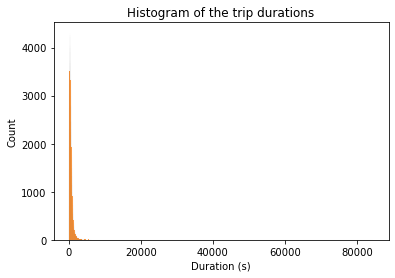

In [33]:
sb.histplot(data=bike_data_analysis, x='duration_sec',color=base_color);
plt.title('Histogram of the trip durations')
plt.xlabel('Duration (s)');


Most of the points are clustered at the lower end and the count drops off quickly, there are also a small number of extremely long durations. A logarithmic scale would be more suitable in displaying the distribution.

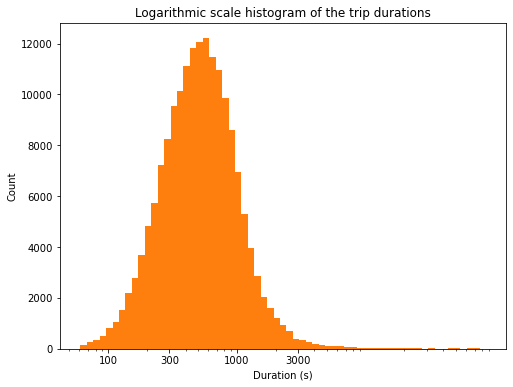

In [34]:
plt.figure(figsize=(8,6))
min_duration = bike_data_analysis['duration_sec'].min()
max_duration = bike_data_analysis['duration_sec'].max()

ticks = [100, 300, 1000, 3000]

bins = 10 ** np.arange(np.log10(min_duration),np.log10(max_duration)+0.05,0.05)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Logarithmic scale histogram of the trip durations');

The data is unimodal and centred around roughly 500 seconds, which is about 8 minutes, after being logarithmically tranformed. The trip duration also appears to be rougly normally distributed after the transformation.

Since there are only a small number of really long trips it could be a good idea to remove outliers by limiting the trip duration to within 2.5 times the inter-quartile range

In [35]:
q25 = bike_data_analysis['duration_sec'].quantile(0.25)
q75 = bike_data_analysis['duration_sec'].quantile(0.75)
iqr = q75 - q25
bike_data_analysis = bike_data_analysis.drop(
    bike_data_analysis[(bike_data_analysis.duration_sec <= q25 - 2.5*iqr) | (bike_data_analysis.duration_sec >= q75 + 2.5*iqr)].index)



Plotting the logarithmic scale plot with the outliers removed.

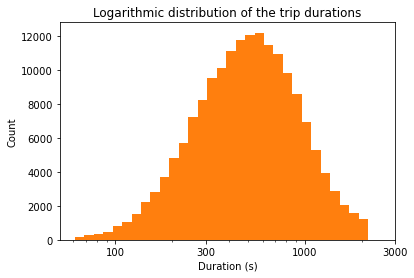

In [36]:
min_duration = bike_data_analysis['duration_sec'].min()
max_duration = bike_data_analysis['duration_sec'].max()

ticks = [100, 300, 1000, 3000]

bins = 10 ** np.arange(np.log10(min_duration),np.log10(max_duration)+0.05,0.05)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Logarithmic distribution of the trip durations');

The plot now shows where the outlier cutoff is.

### Start date
The start date of the trips can be useful to see how usage varies over the month.

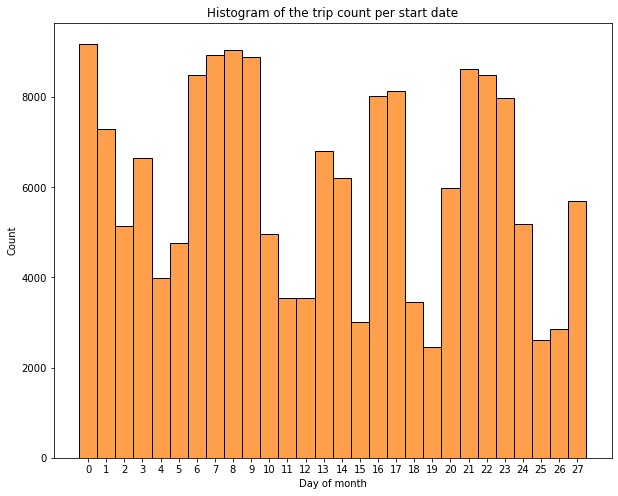

In [37]:
plt.figure(figsize=[10,8])
g = sb.histplot(data=bike_data_analysis,x='start_date',color=base_color)
ticks = [i for i in range(28)]

plt.xticks(ticks,ticks);
plt.title('Histogram of the trip count per start date');
plt.xlabel('Day of month');

While the days with more trips can be easily, seen it would be more informative to see which days of the week had a greater trip count than others.

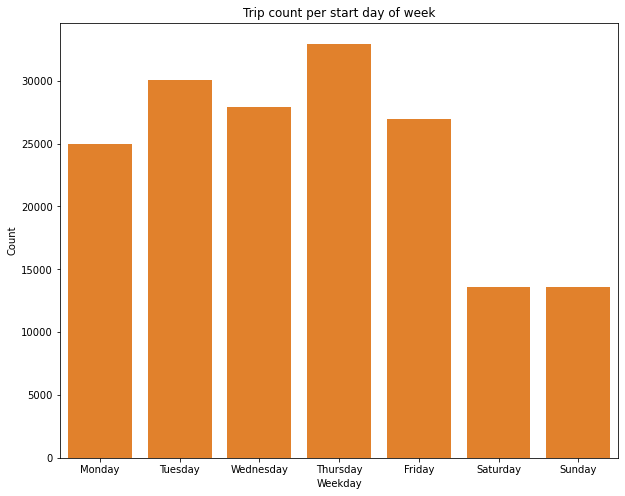

In [38]:
plt.figure(figsize=[10,8])

sb.countplot(data=bike_data_analysis, x='start_day_of_week',color=base_color)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Trip count per start day of week');

Saturday and Sunday have the lowest trip count and Thursday the highest trip count. Work related trips only occuring during the week could help explain this discrepancy.

### Distance
The distribution of the distance between the start and end stations can be used to roughly gauge how far the users travelled on their trips. However from the data in the dataset only the straight line distance from the start station to the end station could be determined.

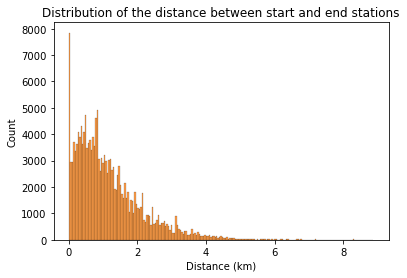

In [39]:
sb.histplot(data=bike_data_analysis,x='distance_km',color=base_color)
plt.xlabel('Distance (km)')
plt.title('Distribution of the distance between start and end stations');

Once again the values are clustered at the low end and drop off quickly with some longer distances. A logarithmic distribution can be used to give more insight. Before this is done it would be helpful to see what proportion of the trips end at the station where the trip started.

In [40]:
# Check how many trips ended where they started
print(sum(bike_data_analysis['same_end_and_start_station']))
percent = sum(bike_data_analysis['same_end_and_start_station'])/bike_data_analysis.count()[1]*100
print(f'{percent:.2f} % of trips ended where they started.')

2587
1.52 % of trips ended where they started.


2587 trips ended at the station where they started and the distance from start to end station is 0 in these cases. These trips would have a distance but this cannot be determined from the dataset as is.

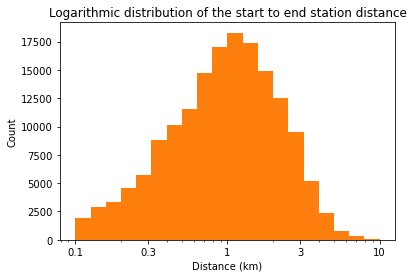

In [41]:
min_distance = 0.1 # Cant use 0 as min due to the logarithmic transformation
max_distance = bike_data_analysis['distance_km'].max()

ticks = [0.1,0.3,1,3,10]

bins = 10 ** np.arange(np.log10(min_distance),np.log10(max_distance)+0.1,0.1)
plt.hist(data=bike_data_copy,x='distance_km',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.title('Logarithmic distribution of the start to end station distance');


The distribution is unimodal around about 1km distance from the start to end station. The values drop off at 10 km distance between the start and end station.

### Time of day
The distribution of the times when the trips started can be used to see when the service is in the most demand.

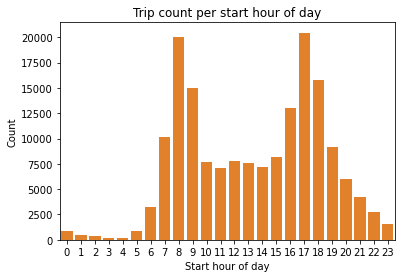

In [42]:
sb.countplot(data=bike_data_analysis, x='start_hour',color=base_color)
plt.xlabel('Start hour of day')
plt.ylabel('Count')
plt.title('Trip count per start hour of day');

The data is bimodal peaking at 8:00 and 17:00 which could correspond to when users will be going to or leaving work. The trip count is also fairly consistent between these 2 times.

### User type

There are 2 user types, subscriber and customer. The relative numbers of each user type can be displayed in a bar chart.

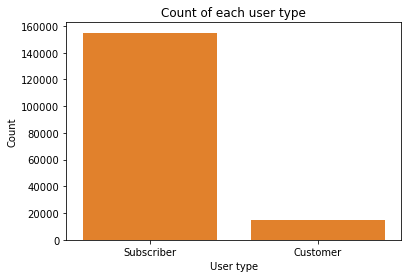

In [43]:

sb.countplot(data=bike_data_analysis, x='user_type', color=base_color);
plt.title('Count of each user type')
plt.xlabel('User type')
plt.ylabel('Count');

In [44]:
sub = sum(bike_data_analysis['user_type'] == 'Subscriber')
print(f'{sub*100/bike_data_analysis.count()[0]:.2f} % of users are subscribers to the service')

91.18 % of users are subscribers to the service


There are a lot more subscribers (91%) than customers in the dataset.

### Member gender

The gender distribution can give further insight into who uses the service

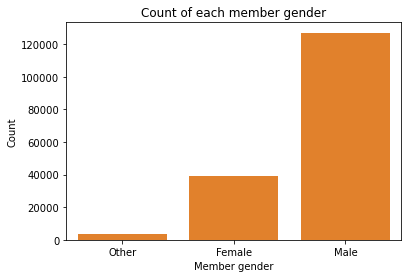

In [45]:
sb.countplot(data=bike_data_analysis,x='member_gender',order=['Other','Female','Male'],color=base_color);
plt.title('Count of each member gender')
plt.xlabel('Member gender')
plt.ylabel('Count');

Males make up the majority followed by female users. There is a small number of users with a gender given as other.

### User birth year

The age demographics can show how old the users of the service were in 2019.

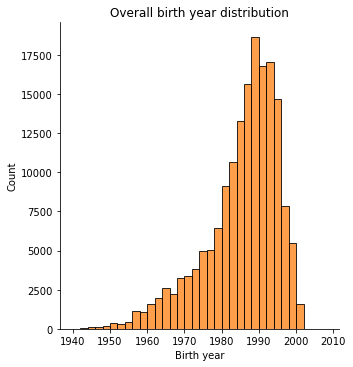

In [46]:
bin_edges = [x for x in range(1940,2010,2)]
sb.displot(data=bike_data_analysis,x='member_birth_year',bins=bin_edges,color=base_color)
plt.title('Overall birth year distribution')
plt.xlabel('Birth year')
plt.ylabel('Count');


The values are skewed to the left peaking around 1990 before dropping off around 1994 rapidly toward 2000. A large number of the users are can be seen to be Adults between 25 and 35(birth years 1985-1994).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Due to some extreme outliers and a rapid drop off in the values of the duration_sec variable a logarithmic transformation was performed and outliers removed. The transformed distribution looked relatively normal. The data was unimodal at 500 seconds or about 8 minutes.

Start date over the month showed which days had more or less trips but grouping by weekday was more informative showing fewer trips on weekends compared to weekdays.

Trip distance from start to end station showed a similar distribution when transformed logarithmically. 1.52% of trips ended where they started. This distribution was unimodal areund just over 1km.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As mentioned outliers were removed from the duration variable as there were a few extremly large values Which added little to making observations about the dataset.

Some features were engineered from the data. Including start day of week, start and end dates and times and a distance between the start and end station. These were done to allow for easier analysis and clearer visualisations.

Some observations with missing data were also removed from the dataset.

## Bivariate Exploration

In [47]:
categoric_vars = ['user_type','member_gender','bike_share_for_all_trip','same_end_and_start_station']
numeric_vars = ['duration_sec', 'member_birth_year','distance_km','start_hour']

### Correlation
A correlation matrix can be used to see if there is any correlation between the numeric variables.

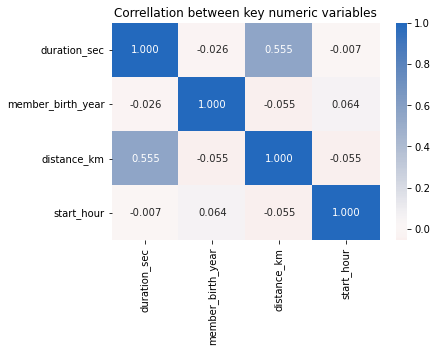

In [48]:
sb.heatmap(bike_data_analysis[numeric_vars].corr(),annot=True,fmt = '.3f',cmap='vlag_r',center=0);
plt.title('Correllation between key numeric variables');

There is only fairly low correlation between duration_sec and distance_km which makes sense as it would take longer to travel a further distance a scatterplot can be plotted to investigate the trend.

### Duration and distance

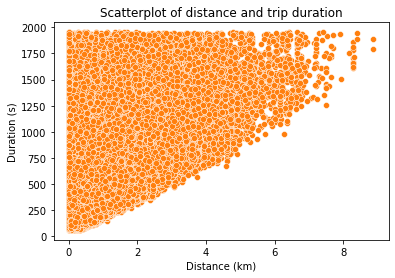

In [49]:
sb.scatterplot(data=bike_data_analysis,x='distance_km',y='duration_sec',color=base_color)
plt.title('Scatterplot of distance and trip duration')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (s)');

The plot indicates what appears to be a linearly increasing minimum time to travel a certain distance. However the time taken could be anything greater than the minimum. This could be explained by the distance only being between the start and end station which doesnt allow for where the trips actually went.

### Boxplots of categorical variables

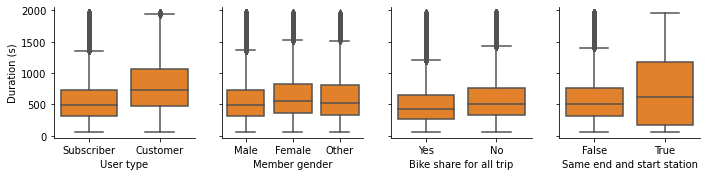

In [50]:
g = sb.PairGrid(data=bike_data_analysis, y_vars=['duration_sec'], x_vars = categoric_vars)
g.map(sb.boxplot,color=base_color);
g.axes[0,0].yaxis.set_label_text('Duration (s)')
x_labels = ['User type','Member gender','Bike share for all trip','Same end and start station']
for i,label in enumerate(x_labels):
    g.axes[0,i].xaxis.set_label_text(label)

For the customer user type the median trip duration is longer with a larger interquartile range than the subscriber user type. 

Females have a slightly longer median trip duration than males with other being similar to female.

The median trip duration is higher for those who used bike sharing for their whole trip.

Trips that ended at the same station where they started have a longer median trip with a much larger inter quartile range.

User type, member gender and same end and start station will be investigated further


### User type

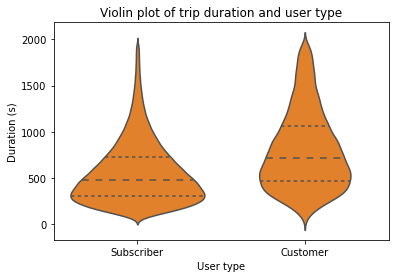

In [51]:
sb.violinplot(data=bike_data_analysis,x='user_type',y='duration_sec',inner='quartile',color=base_color)
plt.title('Violin plot of trip duration and user type')
plt.ylabel('Duration (s)')
plt.xlabel('User type');

The subscriber values rise and drop off quicker than the customer values. It can be seen that the customers participate in longer trips than subscribers tend to.

The box and violin plots of the distance for the user types can also be investigated

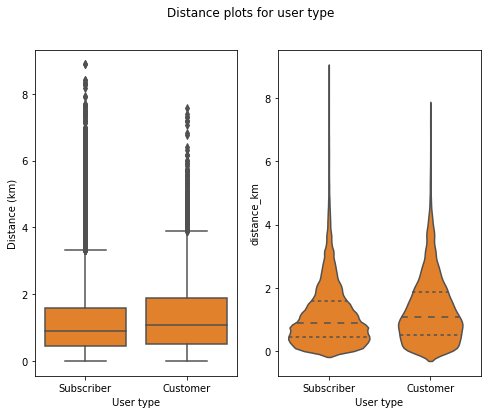

In [52]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(8,6)
plt.suptitle('Distance plots for user type')
sb.boxplot(data=bike_data_analysis,x='user_type',y='distance_km',ax=axes[0],color=base_color)
sb.violinplot(data=bike_data_analysis,x='user_type',y='distance_km',ax=axes[1],inner='quartile',color=base_color)
axes[0].xaxis.set_label_text('User type')
axes[1].xaxis.set_label_text('User type')
axes[0].yaxis.set_label_text('Distance (km)');

The distribution is similar with customers tending to travel to further stations from the start. A few Subscribers did travel further however. 

### Member gender

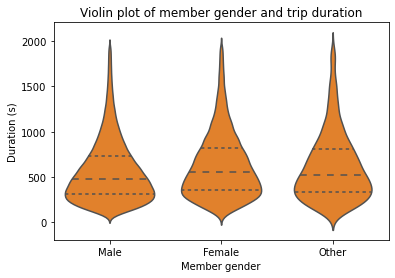

In [53]:
sb.violinplot(data=bike_data_analysis,x='member_gender',y='duration_sec',inner='quartile',color=base_color)
plt.title('Violin plot of member gender and trip duration')
plt.xlabel('Member gender')
plt.ylabel('Duration (s)');

The violin plot does not give much more insight here except for highlighting that the female members tend to take slightly longer trips and the other members actually have a very similar distribution to the female members.

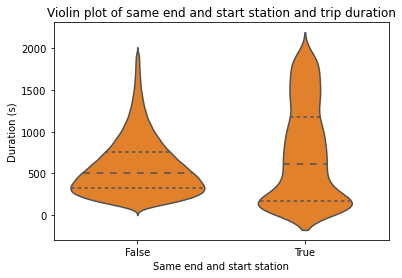

In [54]:
sb.violinplot(data=bike_data_analysis,x='same_end_and_start_station',y='duration_sec',inner='quartile',color=base_color)
plt.title('Violin plot of same end and start station and trip duration')
plt.xlabel('Same end and start station')
plt.ylabel('Duration (s)');

It can be seen how when the trips end at the same station where they started there is a lot more variation. There are also more longer trips where they end where they started .There also are some shorter trips that ended where they started

This could be due to trips between different stations being done as a commute or to get to a specific place and in the other case some of the trips could be for exercise or leisure leading to a longer trip.

### Interaction between categoric variables
By looking at the counts of multiple categories some additional insights can be derived from the dataset.

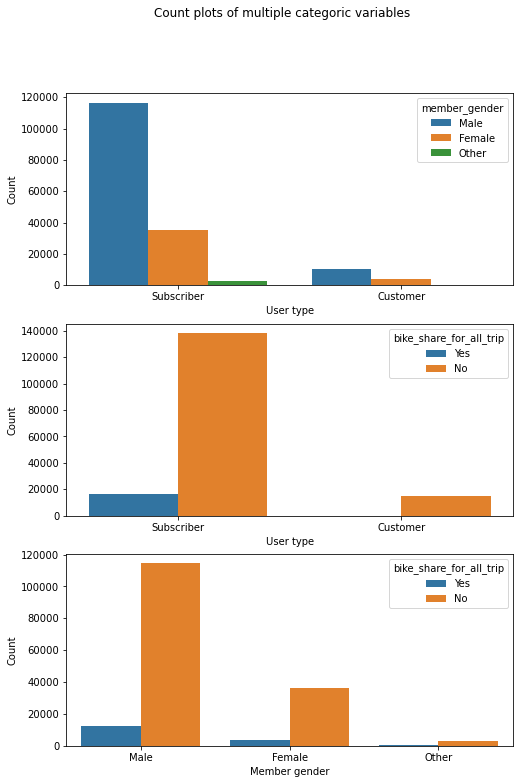

In [55]:
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
plt.suptitle('Count plots of multiple categoric variables')
sb.countplot(data=bike_data_analysis,x='user_type',hue='member_gender')
plt.xlabel('User type')
plt.ylabel('Count')
plt.legend(title='Member gender')
plt.subplot(3,1,2)
sb.countplot(data=bike_data_analysis,x='user_type',hue='bike_share_for_all_trip')
plt.xlabel('User type')
plt.ylabel('Count')
plt.legend(title='Bike share for all trip')
plt.subplot(3,1,3)
sb.countplot(data=bike_data_analysis,x='member_gender',hue='bike_share_for_all_trip')
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.legend(title='Bike share for all trip');

From the plots it can be seen that only subscribers have a gender of other and no customers used bike sharing for their whole trip.

### Age distributions

It would be interesting to see if there is any variation in the age distributions of certain categories of users of the service.

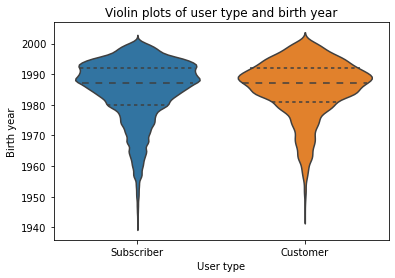

In [56]:
sb.violinplot(data=bike_data_analysis,x='user_type',y='member_birth_year',inner='quartile')
plt.title('Violin plots of user type and birth year')
plt.xlabel('User type')
plt.ylabel('Birth year');



The distribution of the quartiles is roughly the same but the subscribers fall off a bit slower beyond 1990.

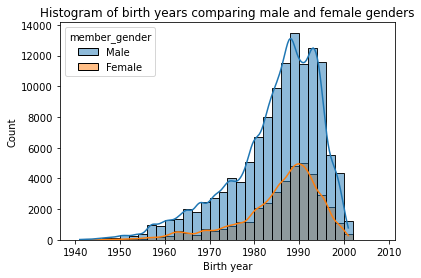

In [57]:
bin_edges = [x for x in range(1940,2010,2)]
sb.histplot(data=bike_data_analysis[bike_data_analysis['member_gender'] != 'Other'],x='member_birth_year', hue='member_gender', bins=bin_edges, kde=True)
plt.title('Histogram of birth years comparing male and female genders')
plt.xlabel('Birth year')
plt.legend(title='Member gender')
plt.ylabel('Count');

The distribution shape is roughly the same for both genders. The peak for male is a bit wider and drops off a bit slower. This could indicate a larger proportion of the male users younger than 30 than female users.

### Duration trends over the week

The variation of mean duration over the week is interesting for seeing when the users take longer or shorter trips.

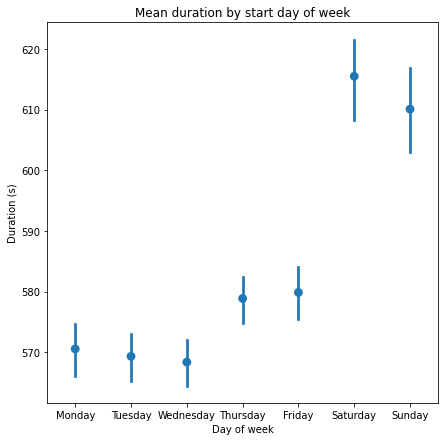

In [58]:
plt.figure(figsize=[7,7])
sb.pointplot(data=bike_data_analysis, x='start_day_of_week', y='duration_sec',linestyles='',)
plt.title('Mean duration by start day of week')
plt.xlabel('Day of week')
plt.ylabel('Duration (s)');

### Location of stations

Using the latitude and longitude the station locations (done by start station) can be shown.

Text(0, 0.5, 'Latitude')

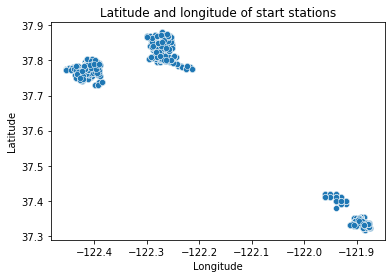

In [59]:
sb.scatterplot(data=bike_data_analysis, y='start_station_latitude', x='start_station_longitude');
plt.title('Latitude and longitude of start stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

4 clusters of stations can be seen. This could be overlaid on a map of the city to see where the stations are in the city.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There was some correlation between the duration and distance variables. A linear increasing minimum duration varying with distance was observed. 

Relationships between the trip duration and categoric variables were investigated. Subscribers tended to take shorter trips than customers in both distance and duration. Female and other gender users tended to take slightly longer trips than Males.

Trips that ended at the same station where they started tended be longer but also had a lot more variation.

Finally looking at the mean trip duration over the week it was found that this was longer on the weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Looking at the counts of users over multiple groups it was found that users that put their gender as other were only in the subscriber category and no customers used bike sharing for their entire trip.

The age distributions for user type and gender were also investigated. The distributions were similar with a slightly larger proportion of users younger than 30 for males and subscribers.

## Multivariate Exploration

### Week and hour trends

To get further information on when most of the trips take place a heatmap of start day and start hour can be plotted.

Text(69.0, 0.5, 'Day')

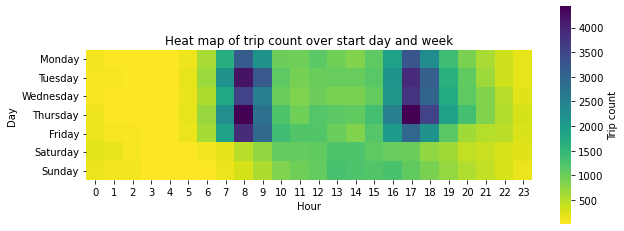

In [60]:
plt.figure(figsize=(10,4))
cat_count = bike_data_analysis.groupby(['start_day_of_week','start_hour']).size()
cat_count = cat_count.reset_index(name='count')
cat_count = cat_count.pivot(index='start_day_of_week', columns='start_hour',values='count')
sb.heatmap(data=cat_count, cbar_kws={'label' : 'Trip count'},square=True,cmap='viridis_r')
plt.title('Heat map of trip count over start day and week')
plt.xlabel('Hour')
plt.ylabel('Day');


The high trip counts from hour 7 to 9 and hour 16 to 18 on Monday to Friday can be clearly seen which could be explained by work commutes. Thursday sees more trips starting at hour 19,20 and 21. It can also be seen that trips on the weekend occur later peaking at hours 13, 14 and 15 this could be due to these times on the weekends being good for leisure trips.

The heatmap of average trip duration can also be investigated.

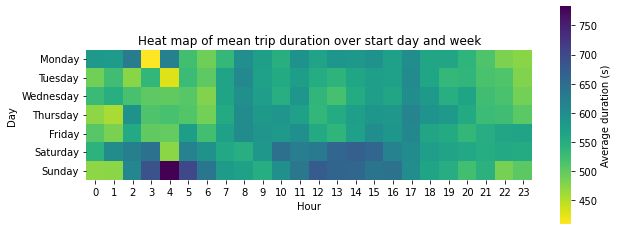

In [76]:
plt.figure(figsize=(10,4))
cat_mean = bike_data_analysis.groupby(['start_day_of_week','start_hour']).mean()['duration_sec']
cat_mean = cat_mean.reset_index()
cat_mean = cat_mean.pivot(index='start_day_of_week', columns='start_hour',values='duration_sec')
sb.heatmap(data=cat_mean, cbar_kws={'label' : 'Average duration (s)'},square=True,cmap='viridis_r')
plt.title('Heat map of mean trip duration over start day and week')
plt.xlabel('Hour')
plt.ylabel('Day');

This time the trends are less clear. The peak hours from the previous heatmap seem to corellate to longer average trip duration. Interestingly a few of the longest averages are found on sundays at hour 3 4 and 5. Very few trips occured at this time which skews the data but a few people clearly take a longer trip at this time.

### Categorical averages over the week

The weekly trends for the average trip duration and distance from start to end station for different groups of users can be investigated to see how the usage differs between the groups.

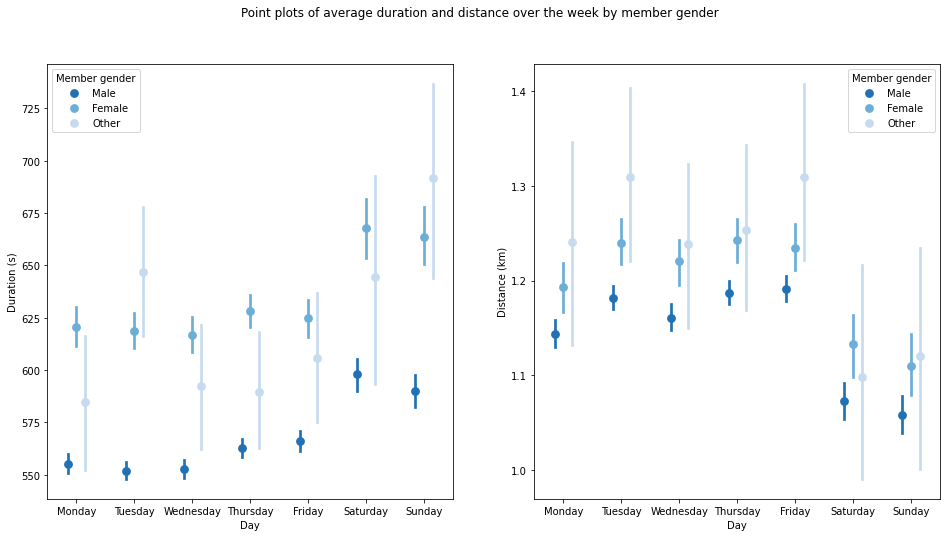

In [81]:
plt.figure(figsize=(16,8))
plt.suptitle('Point plots of average duration and distance over the week by member gender')

plt.subplot(1,2,1)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='duration_sec',hue='member_gender',
             linestyles=' ', dodge=0.3, palette='Blues_r');
plt.xlabel('Day')
plt.ylabel('Duration (s)')
plt.legend(title='Member gender')

plt.subplot(1,2,2)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='distance_km',hue='member_gender',
             linestyles=' ', dodge=0.3, palette='Blues_r');
plt.xlabel('Day')
plt.ylabel('Distance (km)')
plt.legend(title='Member gender');

The average duration is higher for the female users over the week with the weekend durations being longer on average. Users with the gender given as other show more variance due to the low numbers in this category. The female users also travelled between stations that were further away on average. The trips were also between closer stations on weekends on average which is expected for leisure trips that end where they start or near where they started.

The same plots can be generated for the different user types of subscriber and customer.

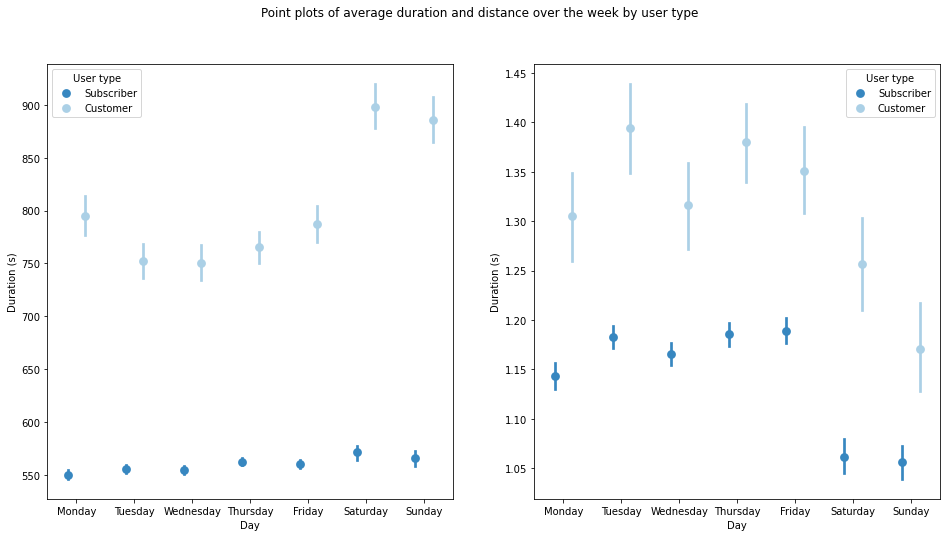

In [72]:
plt.figure(figsize=(16,8))
plt.suptitle('Point plots of average duration and distance over the week by user type')

plt.subplot(1,2,1)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='duration_sec',hue='user_type',
             linestyles=' ', dodge=0.3, palette='Blues_r')
plt.xlabel('Day')
plt.ylabel('Duration (s)')
plt.legend(title='User type')

plt.subplot(1,2,2)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='distance_km',hue='user_type',
             linestyles=' ', dodge=0.3, palette='Blues_r')
plt.xlabel('Day')
plt.ylabel('Distance (km)')
plt.legend(title='User type');


Once again it can be seen that subscribers tend to go on shorter trips than customers. There is also less variation during the week for subscribers. Customers also take longer trips on the weekends. The subscribers also traveled between closer stations especially on weekends with customers taking longer trips than subscribers. There is likely different use cases for both subscribers and customers. Subscribers might be using the service for more routine trips and commutes while customers use it for once off and thus longer trips as well as more for leisure trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Looking at the week and hour trip count heatmap reinforced that the majority of trips occured during the week at peak hours for commuting to and from work. This highlights the primary use case for the service. The heatmap of the mean trip time was less informative but generally showed longer trips at the times when the service was more in demand.

### Were there any interesting or surprising interactions between features?

Females had longer trip duration and distance from start to end station for all days of the week on average. While trips took longer on weekends, the distances between the start and end stations were shorter. This reinforced that the weekday trips were for commutes and weekend trips more for leisure purposes.

## Conclusions

The exploration began with the distribution of the durations of trips and distance from start to end station found to be roughly normal after a logarithmic transformation. The bivariate plot between these 2 showed a weak general trend that is only meaningful in terms of the minimum time to travel between stations with a certain spacing. These metrics proved to be the most informative in the analysis of how the service is used over the days of the week and hours of the day as well as within the categories of users. Trips were found to generally have higher average distance but shorter duration during the weekend compared with the weekdays except for subscribers who had a similar average duration all week.